### *Import Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
#import dataset
hotel = pd.read_excel('Hotel Dataset.xlsx')

### *Exploratory Data Analysis*

In [3]:
hotel.head().transpose()

,0,1,2,3,4
Booking ID,DDMY00001,DDID00002,DDSG00003,DDSG00004,DDKH00005
Date of Booking,2010-01-01 00:00:00,2010-01-01 00:00:00,2010-01-01 00:00:00,2010-01-01 00:00:00,2010-01-01 00:00:00
Time,10:49:40,09:19:47,11:52:56,13:44:40,05:38:26
Customer ID,MY00001,ID00001,SG00001,SG00002,KH00001
Gender,Male,Female,Female,Male,Male
Age,42.0,44.0,31.0,28.0,44.0
Origin Country,Malaysia,Indonesia,Singapore,Singapore,Cambodia
State,Johor,Ciawi,Central,North,Phnom Trop
Location,Iskandar Puteri,West Java,Rochor,Yishun,Pursat
Destination Country,Denmark,Colombia,Germany,Canada,Kenya


In [4]:
hotel.shape

(66541, 24)

In [5]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66541 entries, 0 to 66540
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Booking ID           66541 non-null  object        
 1   Date of Booking      66541 non-null  datetime64[ns]
 2   Time                 66541 non-null  object        
 3   Customer ID          66541 non-null  object        
 4   Gender               66541 non-null  object        
 5   Age                  66541 non-null  float64       
 6   Origin Country       66541 non-null  object        
 7   State                66541 non-null  object        
 8   Location             66541 non-null  object        
 9   Destination Country  66541 non-null  object        
 10  Destination City     66541 non-null  object        
 11  No. Of People        66541 non-null  float64       
 12  Check-in date        66541 non-null  datetime64[ns]
 13  No of Days           0 non-null

In [6]:
#there are some columns we drop because they are not relevant to the analysis we want to carry out
hotel.drop(['Booking ID','Customer ID'], axis=1, inplace=True)

In [7]:
hotel.columns

Index(['Date of Booking', 'Time', 'Gender', 'Age', 'Origin Country', 'State',
       'Location', 'Destination Country', 'Destination City', 'No. Of People',
       'Check-in date', 'No of Days', 'Check-Out Date', 'Rooms', 'Hotel Name',
       'Hotel Rating', 'Payment Mode', 'Bank Name', 'Booking Price[SGD]',
       'Discount', 'GST', 'Profit Margin'],
      dtype='object')

<Axes: >

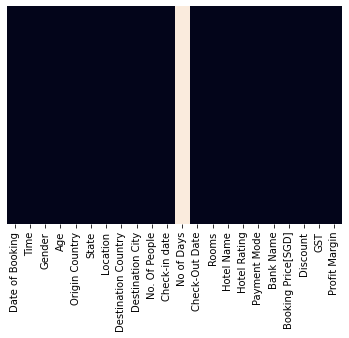

In [8]:
#check for missing values
sns.heatmap(hotel.isnull(), yticklabels=False,cbar=False)

#### We can see that there a no records in the No of Days column, to correct this we can simply calculate the difference in days between check-in and check-out dates

In [9]:
hotel['No of Days'] = hotel['Check-Out Date'] - hotel['Check-in date']

<Axes: >

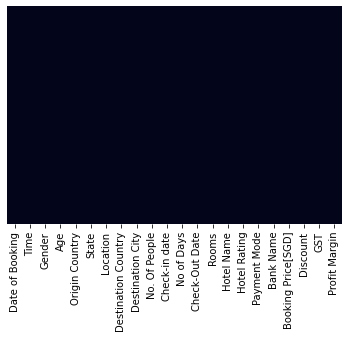

In [10]:
sns.heatmap(hotel.isnull(), yticklabels=False, cbar=False)

#### *As we can see that there are no missing/ null values in the data set, now let us inspect the various columns*

In [11]:
hotel['Age'].unique()

array([42., 44., 31., 28., 32., 49., 58., 57., 41., 40., 37., 51., 25.,
       33., 36., 47., 22., 30., 35., 52., 34., 26., 27., 19., 20., 23.,
       54., 46., 39., 43., 38., 21., 29., 53., 24., 50., 55., 48., 56.,
       45., -5.])

In [12]:
#Let us check how many records have age as -5
hotel[hotel['Age'] == -5]

,Date of Booking,Time,Gender,Age,Origin Country,State,Location,Destination Country,Destination City,No. Of People,...,Check-Out Date,Rooms,Hotel Name,Hotel Rating,Payment Mode,Bank Name,Booking Price[SGD],Discount,GST,Profit Margin
66530,2019-12-31,04:54:08,Male,-5.0,Singapore,East,Bedok,India,Delhi,1.0,...,2020-03-22,1.0,The Royal Sea Resort,4.3,Wallet,DBS Bank,182.0,0.06,0.07,0.24


In [13]:
# since it's just a record we can go on and drop this record
hotel.drop(index=66530, inplace=True)

Text(0.5, 1.0, 'Frequency of Gender Distribution')

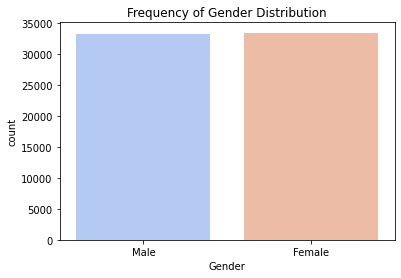

In [14]:
sns.countplot(x='Gender', data=hotel, palette='coolwarm')
plt.title('Frequency of Gender Distribution')

In [15]:
hotel.groupby('Gender').size()

Gender
Female    33388
Male      33152
dtype: int64

Text(0.5, 1.0, 'Distribution of the Number of Rooms')

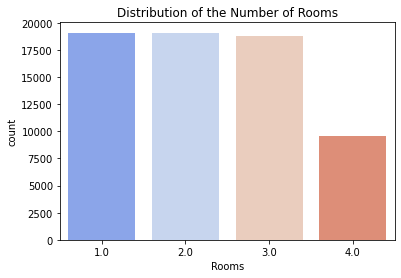

In [32]:
sns.countplot(x='Rooms', data=hotel, palette='coolwarm')
plt.title('Distribution of the Number of Rooms')

Text(0.5, 1.0, 'Distribution of the Number of People')

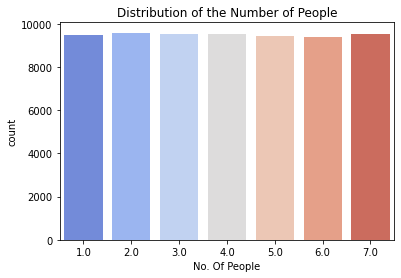

In [33]:
sns.countplot(x='No. Of People', data=hotel, palette='coolwarm')
plt.title('Distribution of the Number of People')

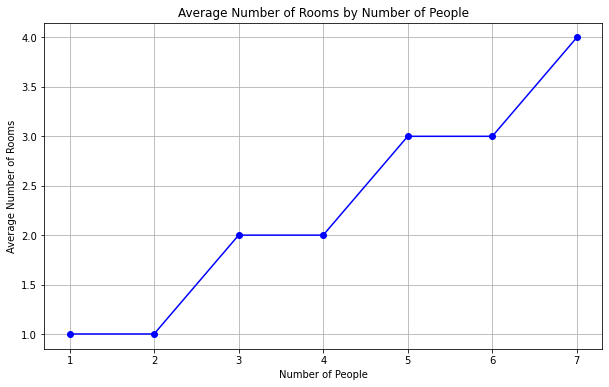

In [18]:
#Let us plot the average number of room by number of people
avg_rooms_by_people = hotel.groupby('No. Of People')['Rooms'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(avg_rooms_by_people['No. Of People'], avg_rooms_by_people['Rooms'], marker='o', color='b', linestyle='-')
plt.xlabel('Number of People')
plt.ylabel('Average Number of Rooms')
plt.title('Average Number of Rooms by Number of People')
plt.grid(True)

Text(0.5, 1.0, 'Distribution of Hotel Rating')

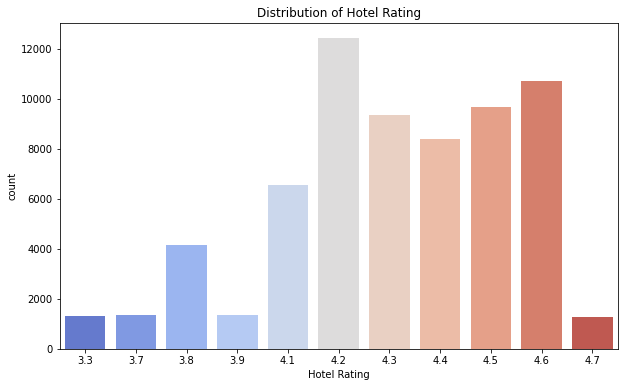

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x='Hotel Rating', data=hotel, palette='coolwarm')
plt.title('Distribution of Hotel Rating')

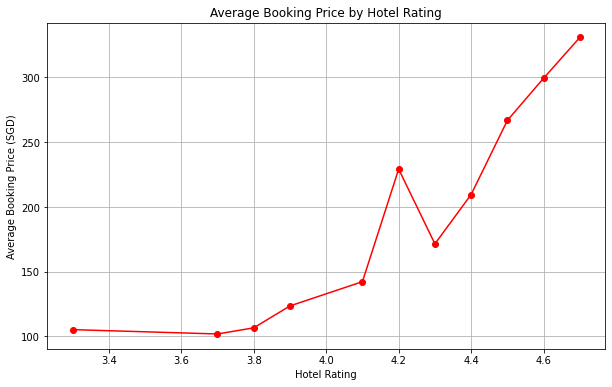

In [20]:
avg_price_by_rating = hotel.groupby('Hotel Rating')['Booking Price[SGD]'].mean().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_rating['Hotel Rating'], avg_price_by_rating['Booking Price[SGD]'], marker='o', color='r', linestyle='-')
plt.xlabel('Hotel Rating')
plt.ylabel('Average Booking Price (SGD)')
plt.title('Average Booking Price by Hotel Rating')
plt.grid(True)

Text(0.5, 1.0, 'Distribution of Payment Modes')

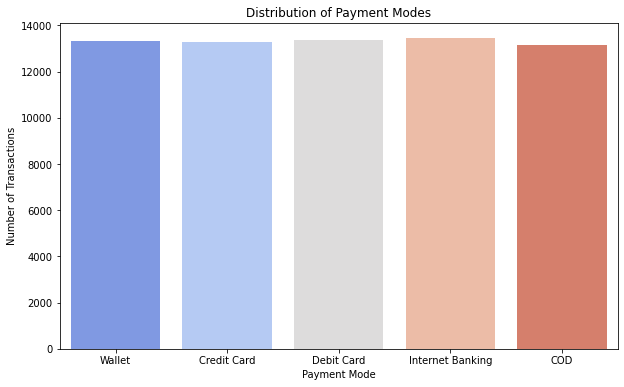

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='Payment Mode', data=hotel, palette='coolwarm')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Payment Modes')

## Time Series Analysis

Text(0.5, 1.0, 'Frequency of Booking by Year')

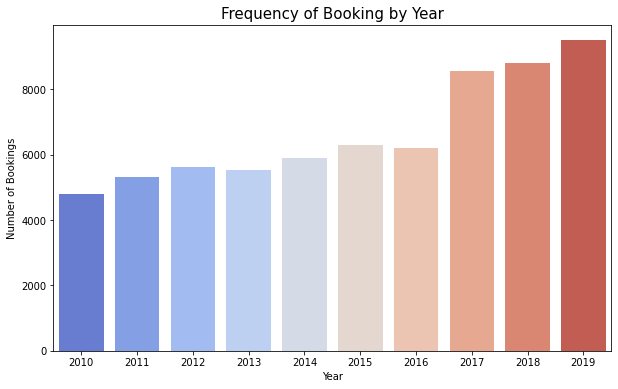

In [22]:
#Extract the year component from the Date of Booking
hotel['Year'] = hotel['Date of Booking'].dt.year

#Count the number of booking per year
yearly_count = hotel['Year'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(x="Year", data=hotel, palette="coolwarm")
plt.ylabel('Number of Bookings')
plt.title("Frequency of Booking by Year", fontsize=15)

C:\Users\edehc\AppData\Local\Temp/ipykernel_2348/2028140231.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  avg_bookings_by_year = hotel.groupby('Year').size().mean(level='Year')


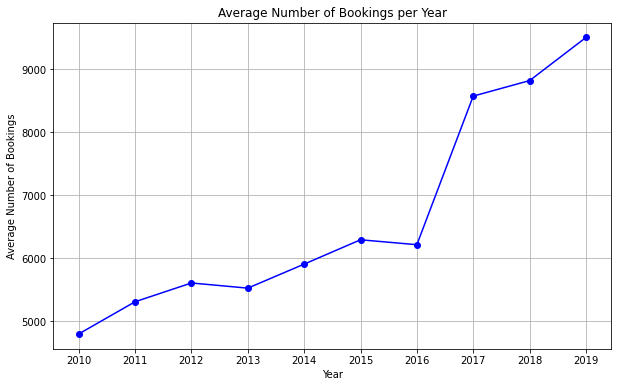

In [23]:
avg_bookings_by_year = hotel.groupby('Year').size().mean(level='Year')
plt.figure(figsize=(10, 6))
avg_bookings_by_year.plot(marker='o', color='b', linestyle='-')
plt.xlabel('Year')
plt.xticks(avg_bookings_by_year.index)
plt.ylabel('Average Number of Bookings')
plt.title('Average Number of Bookings per Year')
plt.grid(True)

### *Over the years, there seems to be a steady growth in the average number of bookings, but in the last three(3) years as covered in the dataset, there was an unprecedented growth.  Does this translate to more revenue, let's find out*

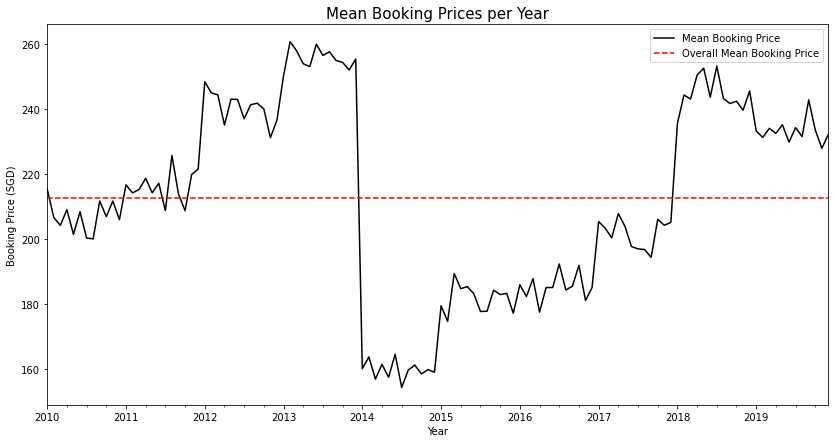

In [24]:
# Resample the DataFrame at monthly intervals and compute the mean booking price, after setting the index to the date of booking
booking_prices_m = (
    hotel.set_index("Date of Booking")
    .resample("M")
    ['Booking Price[SGD]'].mean()
    .rename("Mean Booking Price")
    .to_frame()
)

# Calculate the mean of the booking prices
mean_booking_price = booking_prices_m["Mean Booking Price"].mean()

# Plot the booking prices
fig, ax = plt.subplots(figsize=(14, 7))
booking_prices_m["Mean Booking Price"].plot(label="Mean Booking Price", color="black", ax=ax)
plt.axhline(mean_booking_price, color='red', linestyle='--', label='Overall Mean Booking Price')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Booking Price (SGD)')
plt.title('Mean Booking Prices per Year', fontsize=15)

# Add legend
plt.legend()

### *Despite the exponential growth withnessed in the last three (3) years (from 2017-2019), it did not translate into more revenue, as displayed in the chart above.*
### *We can see that the most properous years was between 2012-2013, with revenue taking it's worst hit in 2014*

Text(0.5, 1.0, 'Frequency of Booking by Quarter')

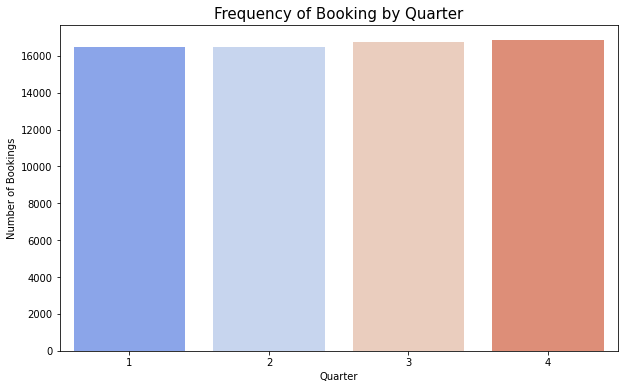

In [25]:
#Extract the quarter component from the Date of Booking
hotel['Quarter'] = hotel['Date of Booking'].dt.quarter

#Count the number of booking per quarter
yearly_count = hotel['Quarter'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(x="Quarter", data=hotel, palette="coolwarm")
plt.ylabel('Number of Bookings')
plt.title("Frequency of Booking by Quarter", fontsize=15)

C:\Users\edehc\AppData\Local\Temp/ipykernel_2348/1222218913.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  avg_bookings_by_quarter = hotel.groupby('Quarter').size().mean(level='Quarter')


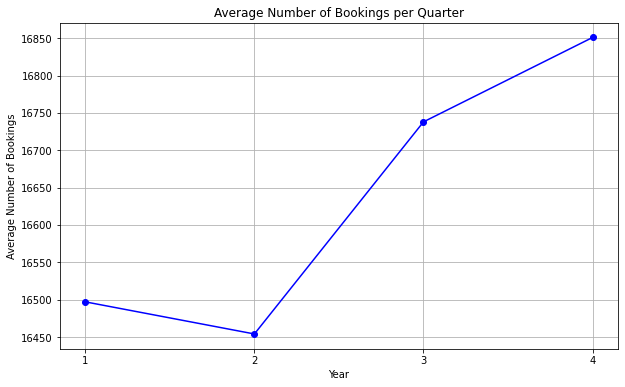

In [114]:
avg_bookings_by_quarter = hotel.groupby('Quarter').size().mean(level='Quarter')
plt.figure(figsize=(10, 6))
avg_bookings_by_quarter.plot(marker='o', color='b', linestyle='-')
plt.xlabel('Year')
plt.xticks(avg_bookings_by_quarter.index)
plt.ylabel('Average Number of Bookings')
plt.title('Average Number of Bookings per Quarter')
plt.grid(True)

In [26]:
#To get the number of booking per quarter
hotel.groupby('Quarter').size().sort_values(ascending=False)

Quarter
4    16851
3    16738
1    16497
2    16454
dtype: int64

### *It can be seen that the fourth quarter has more booking,  due to the festive seasons and holidays, followed closely by the third quarter*
### *On average, the fourth quarter, more bookings than the *

Text(0.5, 1.0, 'Frequency of Booking by Year, filtered by Quarters')

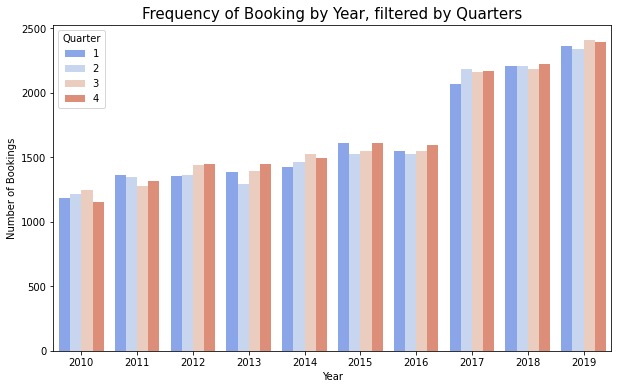

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x="Year", data=hotel, palette="coolwarm", hue='Quarter')
plt.ylabel('Number of Bookings')
plt.title('Frequency of Booking by Year, filtered by Quarters', fontsize=15)

Text(0.5, 1.0, 'Frequency of Booking by Month')

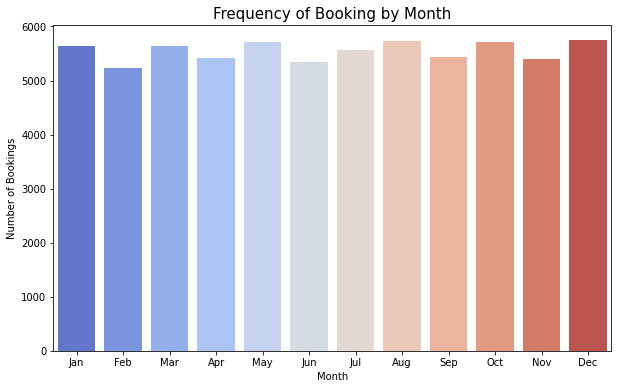

In [39]:
#Extract the month component from the Date of Booking
hotel['Month'] = hotel['Date of Booking'].dt.month

#Count the number of booking per month
monthly_count = hotel['Month'].value_counts()

month_names = [calendar.month_abbr[i] for i in range(1, 13)]  # Abbreviated month names

plt.figure(figsize=(10,6))
sns.countplot(x="Month", data=hotel, palette="coolwarm")
plt.xticks(ticks=range(12), labels=month_names)  # Set the month names as x-axis labels
plt.ylabel('Number of Bookings')
plt.title("Frequency of Booking by Month", fontsize=15)

In [29]:
#Return the value count of the number of bookings per month
hotel.groupby('Month').size().sort_values(ascending=False)

Month
12    5746
8     5733
10    5716
5     5704
3     5636
1     5629
7     5562
9     5443
4     5411
11    5389
6     5339
2     5232
dtype: int64

Text(0.5, 1.0, 'Heatmap of Bookings by Month and Hour')

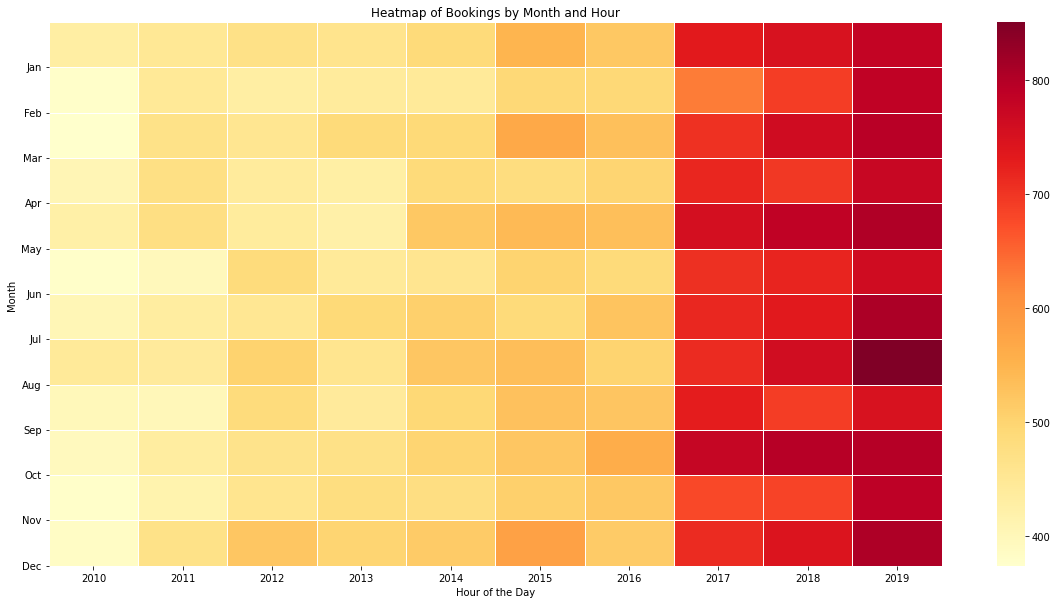

In [42]:
# Create a pivot table with month as rows, hour as columns, and count of bookings as values
pivot_table = hotel.pivot_table(index='Month', columns='Year', aggfunc='size')

# Create the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_table, cmap="YlOrRd", linewidths=0.5)
plt.xlabel('Hour of the Day')
month_labels = [calendar.month_abbr[i] for i in range(1, 13)]  # Get month abbreviations
plt.yticks(ticks=range(1, 13), labels=month_labels)
plt.yticks(rotation=0)
plt.title('Heatmap of Bookings by Month and Hour')

## Financial Analysis

In [55]:
# Let's look to calculate the actual profit from the booking price and profit margin
hotel['Profit'] = hotel['Booking Price[SGD]'] * hotel['Profit Margin']

In [56]:
# Now, we categorize the profit by hotel rating, to find the most profitable hotels, based of their rating

### To get the operational cost per booking we have to subtract all necessary deductions from the booking price

In [59]:
# Discount
hotel['actual_discount'] = hotel['Booking Price[SGD]'] * hotel['Discount']

In [60]:
# Tax
hotel['Tax'] = hotel['Booking Price[SGD]'] * hotel['GST']

In [147]:
hotel['Operational_Cost'] = hotel['Booking Price[SGD]'] - (hotel['Profit'] + hotel['actual_discount'] + hotel['Tax'])

In [89]:
avg_hotel_rating_profit =round(hotel.groupby('Hotel Rating')['Profit'].mean(),2) # We round to 2 d.p., because we are dealing with currency
avg_hotel_rating_profit.sort_values(ascending=False)

Hotel Rating
4.7    82.72
4.6    47.79
4.5    43.38
4.2    42.24
4.4    37.93
4.3    37.52
3.9    37.07
3.7    30.57
3.3    29.47
4.1    24.99
3.8    24.58
Name: Profit, dtype: float64

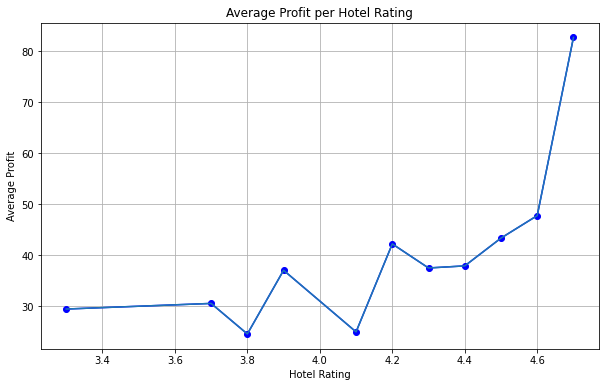

In [146]:
plt.figure(figsize=(10, 6))
avg_hotel_rating_profit.plot(marker='o', color='b', linestyle='-')
plt.ylabel('Average Profit')
plt.title('Average Profit per Hotel Rating')
avg_hotel_rating_profit.plot()
plt.grid(True)

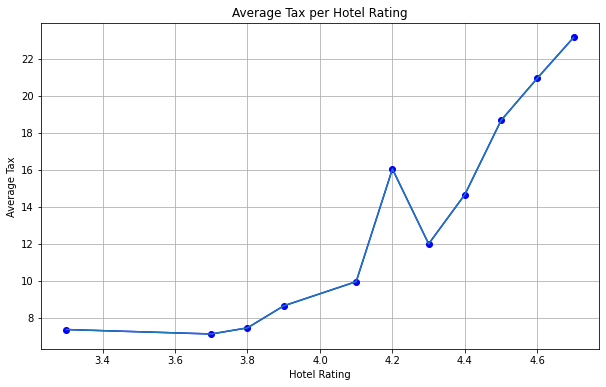

In [145]:
avg_hotel_rating_tax = round(hotel.groupby('Hotel Rating')['Tax'].mean(),2)
plt.figure(figsize=(10, 6))
avg_hotel_rating_tax.plot(marker='o', color='b', linestyle='-')
plt.ylabel('Average Tax')
plt.title('Average Tax per Hotel Rating')
avg_hotel_rating_tax.plot()
plt.grid(True)

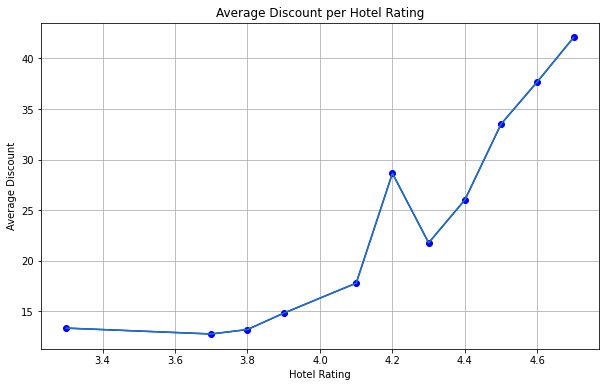

In [144]:
avg_hotel_rating_discount = round(hotel.groupby('Hotel Rating')['actual_discount'].mean(),2)
plt.figure(figsize=(10, 6))
avg_hotel_rating_discount.plot(marker='o', color='b', linestyle='-')
plt.ylabel('Average Discount')
plt.title('Average Discount per Hotel Rating')
avg_hotel_rating_discount.plot()
plt.grid(True)

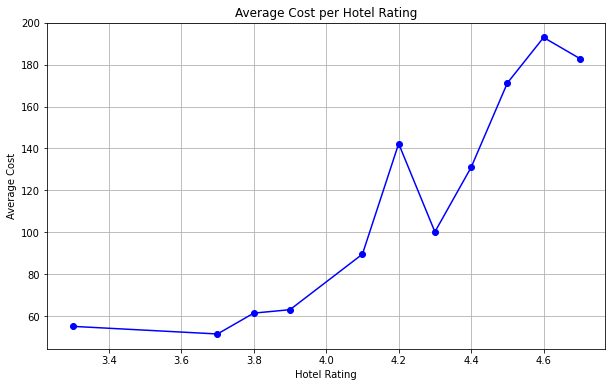

In [143]:
avg_hotel_rating_cost = round(hotel.groupby('Hotel Rating')['Operational_Cost'].mean(),2)
plt.figure(figsize=(10, 6))
avg_hotel_rating_cost.plot(marker='o', color='b', linestyle='-')
plt.ylabel('Average Cost')
plt.title('Average Cost per Hotel Rating')
plt.grid(True)

In [122]:
avg_hotel_rating_cost.sort_values(ascending=False)

Hotel Rating
4.6    192.99
4.7    182.93
4.5    171.25
4.2    142.30
4.4    130.99
4.3    100.19
4.1     89.56
3.9     63.05
3.8     61.41
3.3     55.10
3.7     51.46
Name: Operational_Cost, dtype: float64

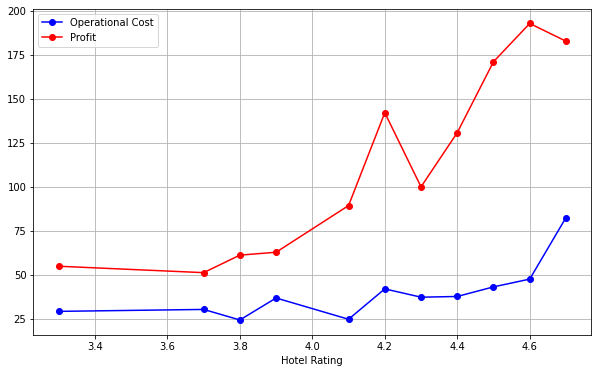

In [138]:
plt.figure(figsize=(10, 6))
avg_hotel_rating_profit.plot(marker='o', color='b')
avg_hotel_rating_cost.plot(marker='o', color='r')
plt.grid(True)
plt.legend(['Operational Cost', 'Profit'])

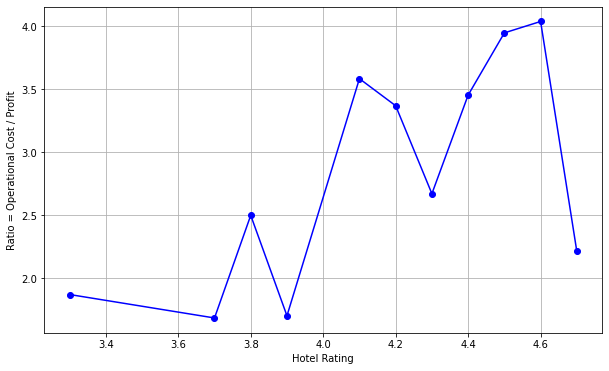

In [142]:
ratio = avg_hotel_rating_cost / avg_hotel_rating_profit
plt.figure(figsize=(10,6))
plt.ylabel('Ratio = Operational Cost / Profit')
ratio.plot(marker='o', color='b')
plt.grid(True)

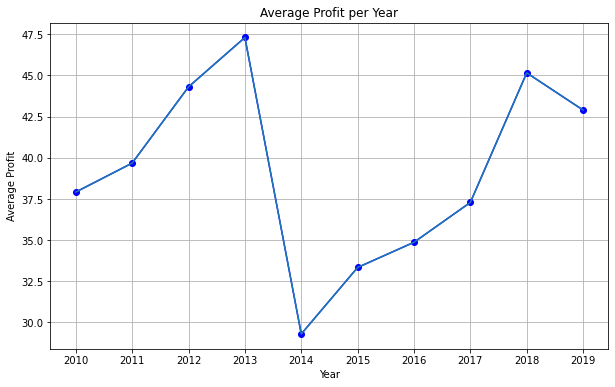

In [119]:
avg_yearly_profit = round(hotel.groupby('Year')['Profit'].mean(),2)
plt.figure(figsize=(10, 6))
avg_yearly_profit.plot(marker='o', color='b', linestyle='-')
plt.xticks(avg_yearly_profit.index)
plt.ylabel('Average Profit')
plt.title('Average Profit per Year')
avg_yearly_profit.plot()
plt.grid(True)

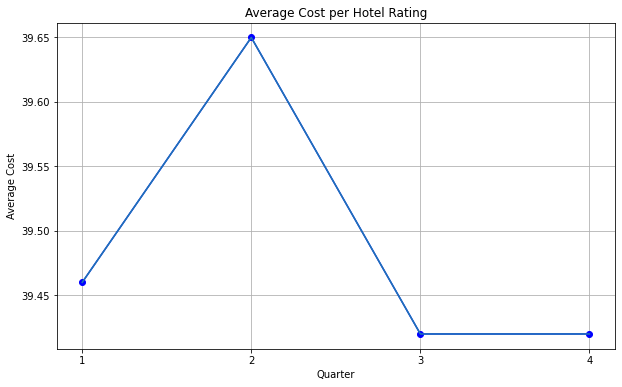

In [117]:
avg_quarter_profit = round(hotel.groupby('Quarter')['Profit'].mean(),2)
plt.figure(figsize=(10, 6))
avg_quarter_profit.plot(marker='o', color='b', linestyle='-')
plt.xticks(avg_quarter_profit.index)
plt.ylabel('Average Profit')
plt.title('Average Profit per Quarter')
avg_quarter_profit.plot()
plt.grid(True)

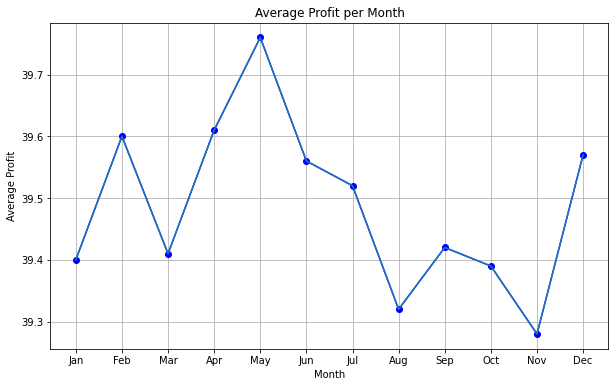

In [121]:
avg_month_profit = round(hotel.groupby('Month')['Profit'].mean(),2)
plt.figure(figsize=(10, 6))
avg_month_profit.plot(marker='o', color='b', linestyle='-')
plt.xticks(avg_month_profit.index)
month_labels = [calendar.month_abbr[i] for i in range(1, 13)]  # Get month abbreviations
plt.xticks(ticks=range(1, 13), labels=month_labels)
plt.ylabel('Average Profit')
plt.title('Average Profit per Month')
avg_month_profit.plot()
plt.grid(True)

## Conclusion
### The second quater, has a slight edge in being a bit more profitable than the rest, but it can be deduced that hotels make more money in the third and fourth quarter because of the high turnover. The year 2013, returned the most profit to hotel owners, with 2012 following closely behind. 

### Hotels with rating *4.7* are the most profitable hotels, as they have learned to charge more and spend less,  hotels with rating *4.3* seem to have followed along the same pattern of knowing how to get the best bang for buck, with the most expensive hotel to run being those rated *4.6*. It is common for hotels that charge more to pay more tax and give out more discounts to customers.

### In general, hotels with rating *4.2* seem to be the rampant choice when booking, this is because these hotels provide the best value for money, with the last two(2) quarters having the most number of booking and returning the most profit, due to a high turnover of guests.